In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as signal

In [2]:
#解决作图时中文无法显示的问题
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=14)
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问问题

实验四程序

array([ 3.00000000e+00,  2.74557430e+00,  2.06458811e+00,  1.17165058e+00,
        3.30400649e-01, -2.46129509e-01, -4.70571791e-01, -4.01987585e-01,
       -2.06226278e-01, -7.53441055e-02, -1.42039522e-01, -4.25577529e-01,
       -8.30484738e-01, -1.19553718e+00, -1.36892326e+00, -1.27535462e+00,
       -9.46299565e-01, -5.02365556e-01, -9.86448898e-02,  1.40393772e-01,
        1.66977472e-01,  1.82389403e-02, -2.13568468e-01, -4.31312609e-01,
       -5.77739881e-01, -6.53281482e-01, -7.00180726e-01, -7.63747691e-01,
       -8.53197787e-01, -9.24586056e-01, -8.96802247e-01, -6.94140675e-01,
       -2.94272364e-01,  2.44013491e-01,  7.90554380e-01,  1.19069289e+00,
        1.33033552e+00,  1.18968417e+00,  8.59155695e-01,  5.06877535e-01,
        3.09016994e-01,  3.72099882e-01,  6.81882762e-01,  1.10319690e+00,
        1.43346730e+00,  1.48874473e+00,  1.18577436e+00,  5.84013466e-01,
       -1.32115206e-01, -7.24954288e-01, -1.00000000e+00, -8.86411923e-01,
       -4.67318395e-01,  

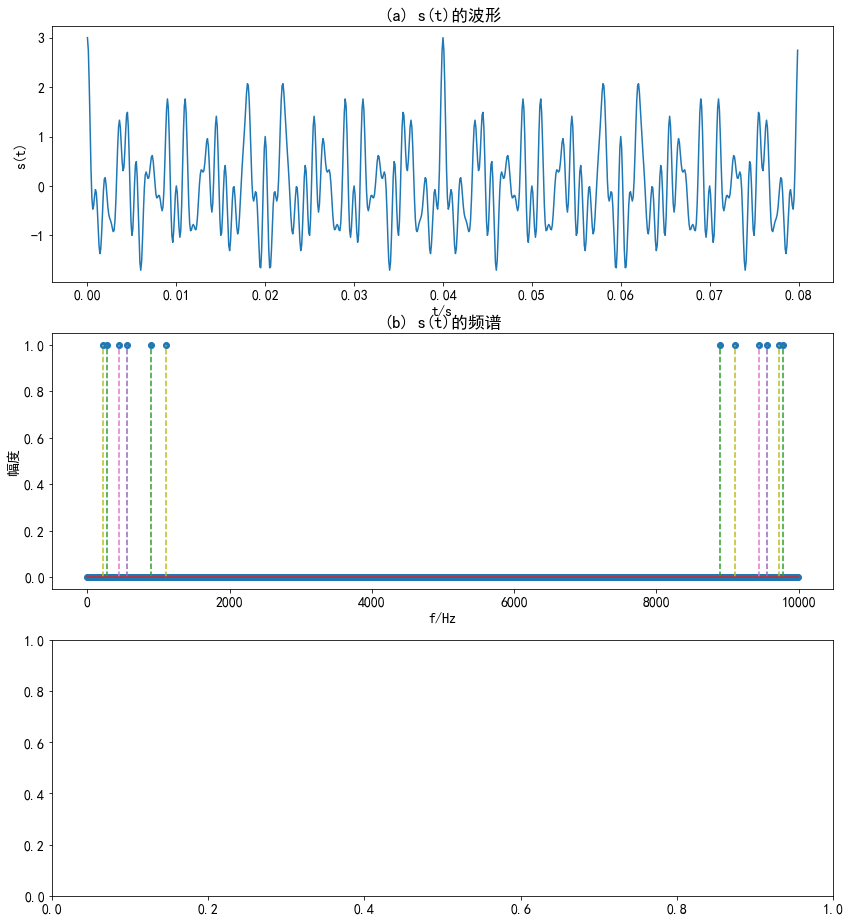

In [3]:
def mstg():
    #产生信号序列向量st,并显示st的时域波形和频谱
    #st=mstg 返回三路调幅信号相加形成的混合信号,长度N=1600
    #N为信号st的长度
    N=800
    #采样频率Fs=10 kHz, Tp为采样时间
    Fs=10000
    T=1/Fs
    Tp=N*T
    
    t=np.arange(0,N*T,T)
    k=np.arange(0,N)
    f=k/Tp
    
    #第1路调幅信号的载波频率fc1=1000 Hz
    fc1=Fs/10
    #第1路调幅信号的调制信号频率fm1=100 Hz
    fm1=fc1/10
    
    #第2路调幅信号的载波频率fc2=500 Hz
    fc2=Fs/20
    #第2路调幅信号的调制信号频率fm2=50 Hz
    fm2=fc2/10
    
    #第3路调幅信号的载波频率fc3=250 Hz
    fc3=Fs/40
    #第3路调幅信号的调制信号频率fm3=25 Hz
    fm3=fc3/10
    
    #产生第1路调幅信号
    xt1=np.cos(2*np.pi*fm1*t)*np.cos(2*np.pi*fc1*t)
    #产生第2路调幅信号
    xt2=np.cos(2*np.pi*fm2*t)*np.cos(2*np.pi*fc2*t)
    #产生第3路调幅信号
    xt3=np.cos(2*np.pi*fm3*t)*np.cos(2*np.pi*fc3*t)
    
    #三路调幅信号相加
    st=xt1+xt2+xt3
    #计算信号st的频谱
    fxt=np.fft.fft(st,N)

    #以下为绘图部分，绘制st的时域波形和幅频特性曲线
    fig,axxr=plt.subplots(3,1,figsize=(14,16))
    axxr[0].plot(t,st)
    axxr[0].set_title("(a) s(t)的波形")
    axxr[0].set_xlabel("t/s")
    axxr[0].set_ylabel("s(t)")
    axxr[1].stem(f,abs(fxt)/np.max(abs(fxt)),'--')
    axxr[1].set_title("(b) s(t)的频谱")
    axxr[1].set_xlabel("f/Hz")
    axxr[1].set_ylabel("幅度")

    return st
mstg()

In [6]:
#时域离散系统损耗函数绘图
def myplot(B,A):
    #B为系统函数分子多项式系数向量
    #A为系统函数分母多项式系数向量
    #计算数字滤波器的频率响应
    [H,W]=signal.freqz(B,A,1000)        #数字滤波器的频率响应
    #y1=np.fft.fft(B,A,st)
    #plt.plot(np.arange(len(y1))/fs,y1)
    plt.plot(W,20*np.log10(max(abs(H))/(abs(H))))
    plt.grid(True)
    plt.xlabel("\omega/\pi")
    plt.ylabel('幅度(dB)')
    plt.title('损耗函数曲线')


In [7]:
#时域序列连续曲线绘图函数
def tplot(xn,T,yn):
    #xn：信号数据序列，yn：绘图信号的纵坐标名字(字符串)
    #T为采样间隔
    n=np.arange(len(xn))
    t=n*T
    plt.plot(t,xn)
    plt.xlabel("t/s")
    plt.ylabel(yn)
    #plt.title("滤波后的时域波形")

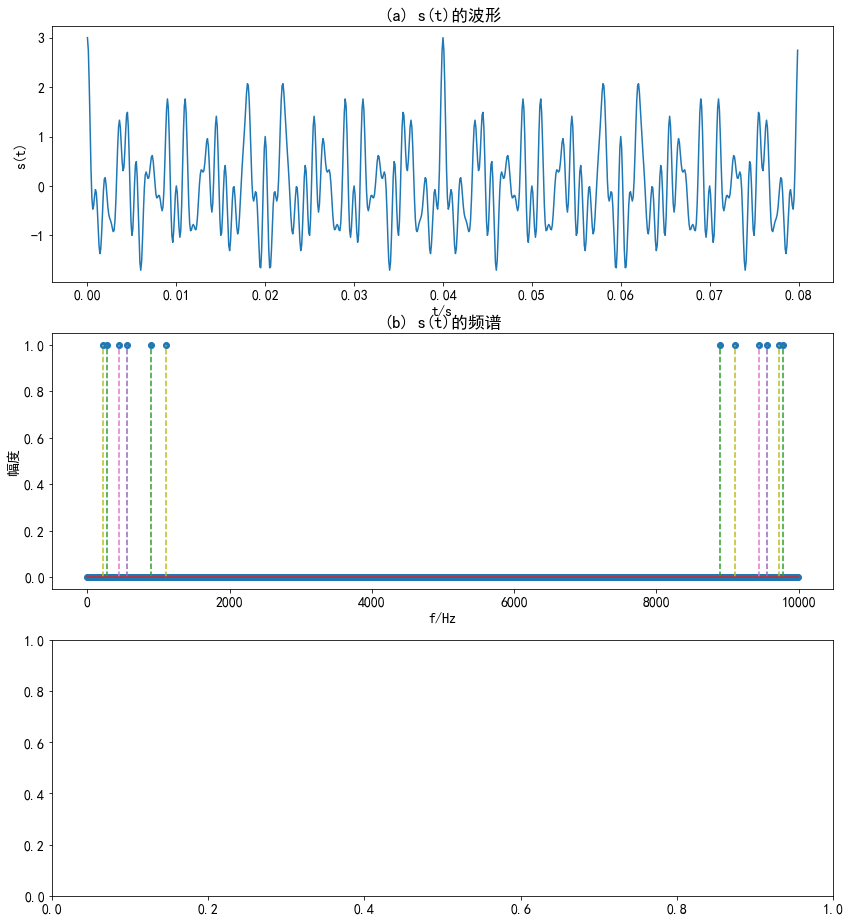

In [8]:
#IIR数字滤波器设计及软件实现
#采样频率
Fs=10000
T=1/Fs
#调用信号产生函数mstg产生由三路抑制载波调幅信号相加构成的复合信号st 
st=mstg()

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


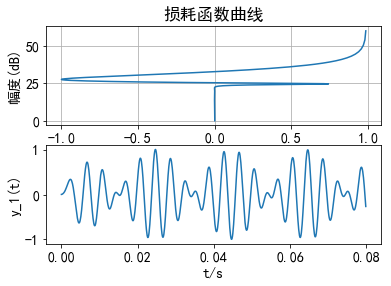

In [9]:
#低通滤波器设计与实现=========================
#DF指标（低通滤波器的通、 阻带边界频率）
fp=280
fs=450;
wp=2*fp/Fs
ws=2*fs/Fs
rp=0.1
rs=60;    
#调用ellipord计算椭圆DF阶数N和通带截止频率wp
[N,wp]=signal.ellipord(wp,ws,rp,rs);      
#调用ellip计算椭圆带通DF系统函数系数向量B和A
[B,A]=signal.ellip(N,rp,rs,wp);  
#低通滤波器设计与实现绘图部分
#调用绘图函数myplot绘制损耗函数曲线
plt.subplot(2,1,1);
myplot(B,A);
#滤波器软件实现
y1t=signal.lfilter(B,A,st);    
#调用绘图函数tplot绘制滤波器输出波形
yt='y_1(t)';
plt.subplot(2,1,2);
tplot(y1t,T,yt);  

In [144]:
#带通滤波器设计与实现=========================
fpl=440;
fpu=560;
fsl=275;
fsu=900;
wp=[2*fpl/Fs,2*fpu/Fs]; 
ws=[2*fsl/Fs,2*fsu/Fs];
rp=0.1;
rs=60; 
#调用ellipord计算椭圆DF阶数N和通带截止频率wp
[N,wp]=signal.ellipord(wp,ws,rp,rs);
#调用ellip计算椭圆带通DF系统函数系数向量B和A
#[B,A]=signal.ellip(N,rp,rs,wp); 
[B,A]=signal.ellip(N,rp,rs,wp,'bandpass');
#滤波器软件实现
y2t=signal.lfilter(B,A,st);     

D:\program\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
D:\program\anaconda\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


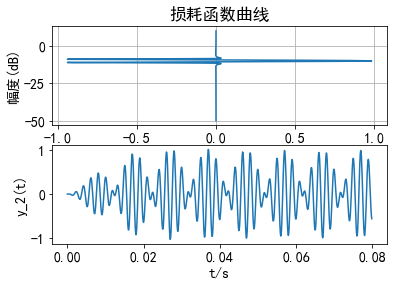

In [145]:
#带通滤波器设计与实现绘图部分
#调用绘图函数myplot绘制损耗函数曲线
plt.subplot(2,1,1);
myplot(B,A);
#调用绘图函数tplot绘制滤波器输出波形
yt='y_2(t)';
plt.subplot(2,1,2);
tplot(y2t,T,yt);      

In [146]:
#高通滤波器设计与实现===========================
fp=890;
fs=600;
wp=2*fp/Fs; 
ws=2*fs/Fs;
rp=0.1;
rs=60;    
#DF指标（低通滤波器的通、 阻带边界频率）
#调用ellipord计算椭圆DF阶数N和通带%截止频率wp
[N,wp]=signal.ellipord(wp,ws,rp,rs);     
#调用ellip计算椭圆带通DF系统函数系数向量B和A
[B,A]=signal.ellip(N,rp,rs,wp,'high');  
#滤波器软件实现
y3t=signal.lfilter(B,A,st); 

D:\program\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
D:\program\anaconda\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


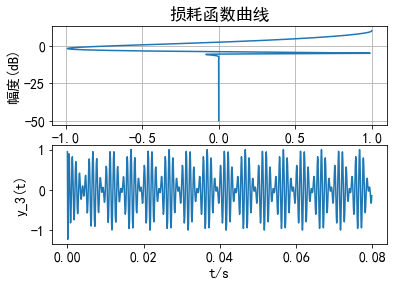

In [147]:
#高低通滤波器设计与实现绘图部分
#调用绘图函数myplot绘制损耗函数曲线
plt.subplot(2,1,1);
myplot(B,A);
#调用绘图函数tplot绘制滤波器输出波形
yt='y_3(t)';
plt.subplot(2,1,2);
tplot(y3t,T,yt);    